In [77]:
def printGraph(pairs):
    G = nx.Graph()
    for pair in pairs:
        G.add_node(pair[0])
        G.add_node(pair[1])
        G.add_edge(pair[0], pair[1])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

In [15]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [16]:
with open('data/manually_collected/text/0_original.txt', 'r') as handle:
    caption = handle.readlines()[0]
    
with open('data/manually_collected/text/10450.txt', 'r') as handle:
    caption2 = handle.readlines()[0]

In [90]:
doc1 = nlp(caption)
doc2 = nlp(caption2)
caption2

'Everything on the table, from the fluted glass and goblet to the lobster and crab, is indeed life-like. You can almost smell the lemons. The Dutch proudly displayed such expensive status symbols in their homes, the exotic food and material possessions reminding them of the good things in life, even as the watch reminds them of their transience. The bread and wine, in a touch of Christian symbolism, echo the moralizing message of vanitas, or vanity: all earthly things must pass.'

In [19]:
# for token in doc2:
#     if not token.is_stop:
#         print(token)

In [25]:
for chunk in doc2.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.dep_,
            chunk.root.head.text)

Everything Everything nsubj ROOT is
the table table pobj prep on
the fluted glass glass pobj prep from
the lobster lobster pobj prep to
crab crab conj pobj lobster
You You nsubj ROOT smell
the lemons lemons dobj ROOT smell
The Dutch Dutch nsubj ROOT displayed
such expensive status symbols symbols dobj ROOT displayed
their homes homes pobj prep in
the exotic food and material possessions possessions nsubj advcl reminding
them them dobj advcl reminding
the good things things pobj prep of
life life pobj prep in
the watch watch nsubj advcl reminds
them them dobj advcl reminds
their transience transience pobj prep of
The bread bread nsubj ccomp echo
wine wine conj nsubj bread
a touch touch pobj prep in
Christian symbolism symbolism pobj prep of
the moralizing message message dobj ccomp echo
vanitas vanitas pobj prep of
vanity vanity conj dobj message
all earthly things things nsubj ROOT pass


In [85]:
# doc = nlp("Autonomous cars shift insurance liability toward manufacturers")
# Since this is an interactive Jupyter environment, we can use displacy.render here
displacy.render(doc2, style='dep')

In [71]:
caption2

'Everything on the table, from the fluted glass and goblet to the lobster and crab, is indeed life-like. You can almost smell the lemons. The Dutch proudly displayed such expensive status symbols in their homes, the exotic food and material possessions reminding them of the good things in life, even as the watch reminds them of their transience. The bread and wine, in a touch of Christian symbolism, echo the moralizing message of vanitas, or vanity: all earthly things must pass.'

In [113]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("merge_entities")
nlp.add_pipe("merge_noun_chunks")

tokens = [token.text + ' ' for token in doc2 if not token.is_stop or token.dep_=='det']

tokens = ''.join(tokens)
print(tokens)

pairs = []

for doc in nlp.pipe([tokens]):
    for token in doc:
        if not token.is_stop:
#         if token.ent_type_ == "MONEY":
            # We have an attribute and direct object, so check for subject
#             print(token.dep_)
#             print(token)
            if token.dep_ in ("attr", "dobj"):
                subj = [w for w in token.head.lefts if w.dep_ == "nsubj"]
                if subj:
                    print(subj[0], "-->", token)
                    pairs.append((subj[0], token))
            # We have a prepositional object with a preposition
            elif token.dep_ == "pobj" and token.head.dep_ == "prep":
                print(token.head.head, "-->", token)
                pairs.append((token.head.head, token))

the table , the fluted glass goblet the lobster crab , life - like . smell the lemons . The Dutch proudly displayed such expensive status symbols their homes , the exotic food and material possessions reminding the good things life , the watch reminds their transience . The bread wine , a touch Christian symbolism , echo the moralizing message vanitas , vanity : all earthly things pass . 
the table --> the lobster crab
The Dutch --> such expensive status symbols
the watch --> their transience
The bread wine --> the moralizing message vanitas


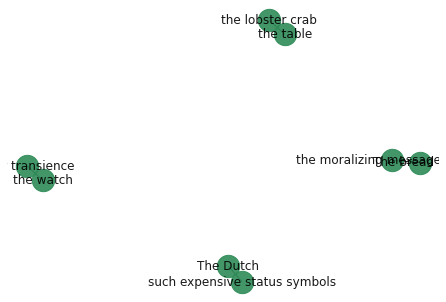

In [114]:
printGraph(pairs)

In [58]:
doc1

The symbolism of the skulls in this painting is obvious, but the rose (quick to wilt) and oil lamp (easily snuffed out) also refer to life’s brevity and fragility. The vanitas symbolism is underscored by the Latin inscription underneath: “All that is human is smoke, show, vanity and the picture of a stage.”

In [111]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("merge_entities")
nlp.add_pipe("merge_noun_chunks")

tokens = [token.text + ' ' for token in doc1 if not token.is_stop or token.dep_=='det']

tokens = ''.join(tokens)
print(tokens)

pairs = []

for doc in nlp.pipe([tokens]):
    for token in doc:
        if not token.is_stop:
#         if token.ent_type_ == "MONEY":
            # We have an attribute and direct object, so check for subject
#             print(token.dep_)
#             print(token)
            if token.dep_ in ("attr", "dobj"):
                subj = [w for w in token.head.lefts if w.dep_ == "nsubj"]
                if subj:
                    print(subj[0], "-->", token)
                    pairs.append((subj[0], token))
            # We have a prepositional object with a preposition
            elif token.dep_ == "pobj" and token.head.dep_ == "prep":
                print(token.head.head, "-->", token)
                pairs.append((token.head.head, token))

The symbolism the skulls this painting obvious , the rose ( quick wilt ) oil lamp ( easily snuffed ) refer life’s brevity fragility . The vanitas symbolism underscored the Latin inscription underneath : “ human smoke , , vanity the picture a stage . ” 
the rose --> life’s brevity fragility
The vanitas symbolism --> the Latin inscription


In [70]:
displacy.render(doc1, style='dep')